In [31]:
import torchvision
import random
from tools.data_utils import gen_pins, gen_mesh_pins, count_pins, save_data
from tools.plot_utils import visualize_pins, plot_label_pin
import os
import matplotlib.pyplot as plt

In [32]:
def PinMNIST(n, n_pin_max, r, fixed_pins=True, mesh=False, d=1):
    """
    Generate PinMNIST dataset by selecting n unique samples from the original MNIST and adding pins.

    Args:
    n (int): Number of unique samples to select from the original MNIST.
    n_pin_max (int): Maximum number of pins to generate for each sample.
    r (int): Radius for counting adjacent ones around each pin.
    fixed_pins (bool): If True, generates a fixed number of pins (n_pin_max) for all samples. If False, generates a random number of pins for each sample.
    mesh (bool): If True, generates pins on a mesh grid based on the 'd' parameter.
    d (int): Spacing between pins when 'mesh' is True.

    Returns:
    images (list): List of binary images.
    pins (list): List of lists of (x, y) coordinate tuples.
    count_images (list): List of count images where counts are the counted values at the pin locations.
    """
    # Load the original MNIST dataset
    original_mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True)

    # Shuffle the original MNIST dataset
    random.shuffle(original_mnist.data)

    # Initialize lists to store images, pins, and count images
    images = []
    pins = []
    labels = []

    for i in range(n):
        # Get the binary image from the shuffled MNIST dataset
        mnist_image = original_mnist.data[i] / 255.0  # Normalize to [0, 1]

        # Determine the number of pins to generate
        if mesh:
            pin_locations = gen_mesh_pins(mnist_image, d)
        else:
            if fixed_pins:
                n_pins = n_pin_max
            else:
                n_pins = random.randint(1, n_pin_max)
            # Generate random pins for the binary image
            pin_locations = gen_pins(mnist_image, n_pins)

        # Count the adjacent ones for the pins using the count_pins function
        label = count_pins(mnist_image.numpy(), pin_locations, r)

        images.append(mnist_image)
        pins.append(pin_locations)
        labels.append(label)

    return images, pins, labels

In [33]:
n=500
n_pins = 20
fixed_pins = True
mesh = True
d = 4
r = 3
seed = 4
random.seed(seed)

images, pins, labels = PinMNIST(n, n_pins, r, mesh=mesh, d=d)

In [34]:
if mesh:
    data_folder = f"./data/MNIST_{n}images_mesh_{d}step_{28}by{28}pixels_{r}radius_{seed}seed/"
else:
    data_folder = f"./data/MNIST_{n}images_random_fixed{fixed_pins}_{n_pins}pins_{28}by{28}pixels_{r}radius_{seed}seed/"

os.makedirs(data_folder, exist_ok=True)  
save_data(images, pins, labels, data_folder)

Data and images have been saved to the CSV and image files.


In [35]:
def plot_all(image, r):
    pin_locations = gen_mesh_pins(image, 1)
    label = count_pins(image.numpy(), pin_locations, r)
    count_image = plot_label_pin(image, pin_locations, label)
    return count_image

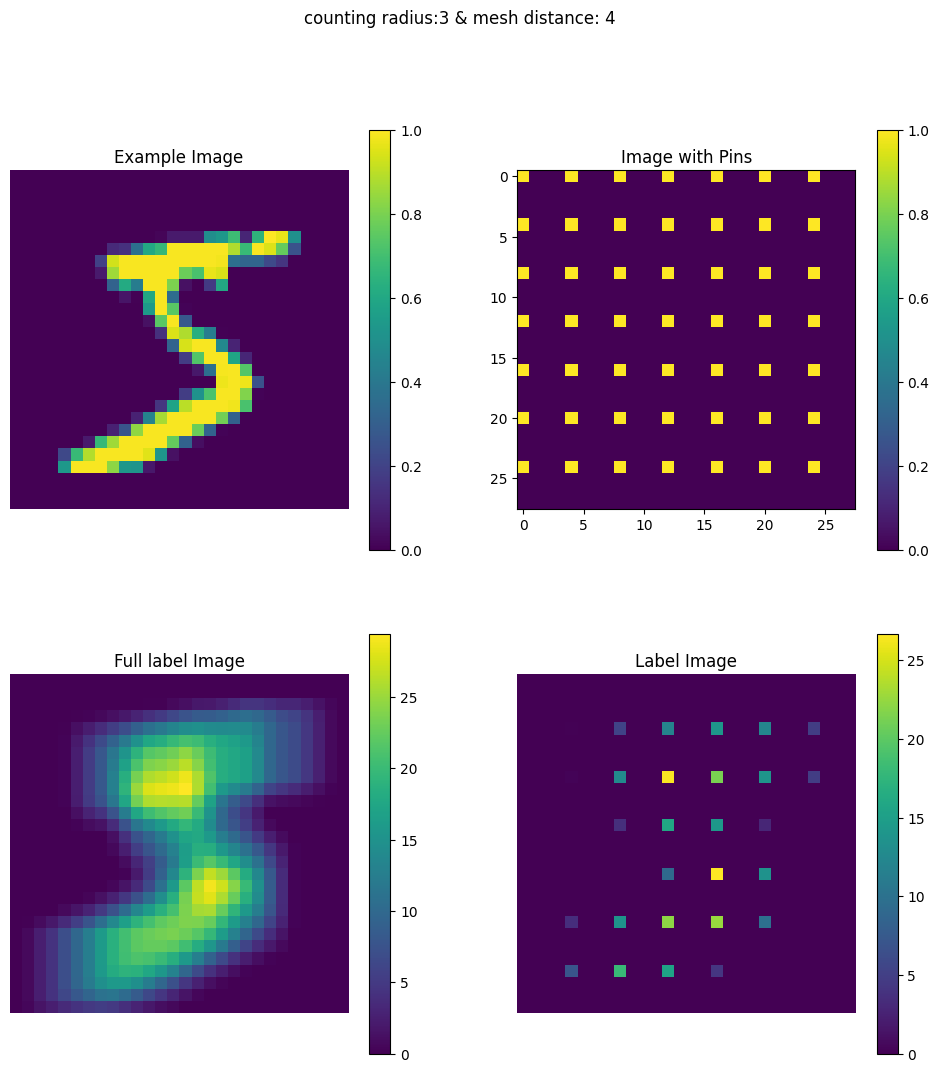

In [36]:
example_image, example_pin, example_label = images[0], pins[0], labels[0]

# Create a subplot with three columns
fig, axes = plt.subplots(2, 2, figsize=(12,12))

# Display the original binary image (example_image) in the first column
axes[0,0].imshow(example_image)
cbar1 = plt.colorbar(axes[0,0].images[0], ax=axes[0,0])  # Add colorbar to axes[1]
axes[0,0].set_title("Example Image")
axes[0,0].axis('off')

# Display the image with pins and color mapping in the second column
pins_image = visualize_pins(example_image, example_pin)
axes[0,1].imshow(pins_image)
cbar1 = plt.colorbar(axes[0,1].images[0], ax=axes[0,1])  # Add colorbar to axes[1]
axes[0,1].set_title("Image with Pins")

all_counted_image = plot_all(example_image, r=r)
im1 = axes[1,0].imshow(all_counted_image)
cbar2 = plt.colorbar(im1, ax=axes[1,0])  # Add colorbar to axes[2]
axes[1,0].set_title("Full label Image")
axes[1,0].axis('off')

# Display the count image (count_image) in the third column
count_image = plot_label_pin(example_image, example_pin, example_label)
im = axes[1,1].imshow(count_image)
cbae3 = plt.colorbar(im, ax=axes[1,1])  # Add colorbar to axes[2]
axes[1,1].set_title("Label Image")
axes[1,1].axis('off')

plt.suptitle(f"counting radius:{r} & mesh distance: {d}")
# plt.tight_layout()
fig.savefig(f"{data_folder}sample.jpg")
plt.show()